# PyTorch Tutorial

Jinhyeok Jeong 
2024-05-14

## 1. Tensor

For more information: https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html <br>

In PyTorch, a tensor is used to encode inputs, outputs, and parameters of a neural network model.
It's similar to NumPy's ndarray and has many parallel functions, but it can be loaded into the GPU.

Tensor objects can be created in various ways. 
It can be made directly with torch.arrray() function, or created from list or numpy array

In [1]:
import torch
import numpy as np

In [2]:
# create tensor directly
a = torch.tensor([[1, 2], [3, 4]])
print("a: \n", a, type(a))

# create tensor from numpy array
b = np.array([[1, 2], [3, 4]])
b = torch.from_numpy(b)  # or you can just do torch.tensor(b)
print("b: \n", b, type(b))

c = [[1, 2], [3, 4]]
c = torch.tensor(c)
print("c: \n", c, type(c))

# you can also change tensor to numpy
d = a.numpy()
print("d: \n", d, type(d))

a: 
 tensor([[1, 2],
        [3, 4]]) <class 'torch.Tensor'>
b: 
 tensor([[1, 2],
        [3, 4]]) <class 'torch.Tensor'>
c: 
 tensor([[1, 2],
        [3, 4]]) <class 'torch.Tensor'>
d: 
 [[1 2]
 [3 4]] <class 'numpy.ndarray'>


When you make a tensor from NumPy or vice versa, be aware that modfiying one can affect another

In [3]:
e1 = np.arange(8)
print(e1)

e2 = torch.from_numpy(e1)
print(e2)

e1[0] = 8  # this will change the value of e2 as well as e1

print(e1)
print(e2)

[0 1 2 3 4 5 6 7]
tensor([0, 1, 2, 3, 4, 5, 6, 7])
[8 1 2 3 4 5 6 7]
tensor([8, 1, 2, 3, 4, 5, 6, 7])


PyTorch has functison that are parallel with NumPy functions. If you are familiar with NumPy, you will find many PyTorch functions that are functionally equivalent to NumPy functions.

In [4]:
a = np.ones(5)
a2 = torch.ones(5)

print(a)
print(a2)

b = np.zeros(5)
b2 = torch.zeros(5)

print(b)
print(b2)

# if you want to make a tensor filled with zeros or ones but with the same size with other tensor,
# you can use the following functions

c = torch.tensor(
    np.random.rand(15).reshape((3, 5))
)  # 3x5 tensor filled with random numbers
print(c)

d = torch.ones_like(c)  # 3x5 tensor filled with ones
print(d)
e = torch.zeros_like(c)  # 3x5 tensor filled with zeros
print(e)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.])
[0. 0. 0. 0. 0.]
tensor([0., 0., 0., 0., 0.])
tensor([[0.5855, 0.8202, 0.1610, 0.0538, 0.9199],
        [0.0297, 0.4564, 0.9411, 0.1971, 0.3493],
        [0.8524, 0.3791, 0.7678, 0.9232, 0.6139]], dtype=torch.float64)
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=torch.float64)
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=torch.float64)


Similar to NumPy, a tensor in PyTorch can be reshaped by using view() or reshape() function.

In [5]:
a = torch.arange(10)
print(a)

a = a.view((2, 5))
print(a)

a = a.reshape((5, 2))
print(a)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])


## 2. Autograd in PyTorch

https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

Autograd is a feautre of PyTorch that makes it flexible and powerful tool for neural network models. 

In [31]:
a = torch.tensor([15.0], requires_grad=True)
b = torch.tensor([6.0], requires_grad=True)

print("a: ", a)
print("b: ", b)

# create another tensor based on a and b
Q = 3 * a**3 - b**2
print("Q: ", Q)

a:  tensor([15.], requires_grad=True)
b:  tensor([6.], requires_grad=True)
Q:  tensor([10089.], grad_fn=<SubBackward0>)


By using autograd feature, partial derivaties of Q w.r.t a and b can be easily computed.
This feature is useful to train neural network models (for back-propagation).

a and b could be parameters and Q could be loss function of a neural network model.

$Q = 3a^3-b^2$

Partial derivatives of Q:

$\dfrac{\partial Q}{\partial a}=9a^2$

$\dfrac{\partial Q}{\partial b}=-2b$

In [32]:
# before computing gradient:
print("a grad: ", a.grad)
print("b grad: ", b.grad)

a grad:  None
b grad:  None


In [33]:
Q.backward()  # computes the partial derivates

In [34]:
# after doing backward computation. it records the gradient information
print("a grad: ", a.grad)
print("b grad: ", b.grad)

print(9 * a**2)
print(-2 * b)

a grad:  tensor([2025.])
b grad:  tensor([-12.])
tensor([2025.], grad_fn=<MulBackward0>)
tensor([-12.], grad_fn=<MulBackward0>)


## 3. Define a simple neural network model

In [10]:
import torch
from torch import nn

neural network model is defined as a class that inherits from nn.Module.

It is assumed that the inputs are images consisting of 28 x 28 pixels.

In [11]:
class simpleNN(nn.Module):

    # every class need to have __init__ function for initialization.
    # additional arguments other than self can be added
    def __init__(self):
        # super(simpleNN, self).__init__() # This is how to do initializatin in older version.
        super().__init__()

        # nn Module has several submodules that can be used to build neural networks.
        # modules instantiated here be used when defining forward function
        self.flatten = nn.Flatten()
        self.linear_relu_stack = (
            nn.Sequential(  # sequential() is an ordered container of modules
                nn.Linear(28 * 28, 512),
                nn.ReLU(),
                nn.Linear(512, 512),
                nn.ReLU(),
                nn.Linear(512, 10),
            )
        )

    # forward function determines the flow of information
    def forward(self, x):
        # assumed that x is a batch of images
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        return logits


model = simpleNN()
print(model)

simpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


the same network model can be defined without using sequential() module.

In [12]:
class simpleNN2(nn.Module):

    def __init__(self):

        super().__init__()

        self.flatten = nn.Flatten()
        self.Linear1 = nn.Linear(28 * 28, 512)
        self.relu1 = nn.ReLU()
        self.Linear2 = nn.Linear(512, 512)
        self.relu2 = (
            nn.ReLU()
        )  # instead of defining two ReLU, defining only one and use twice is fine. However, it is common to define twice for clarity
        self.Linear3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.Linear1(x))
        x = self.relu2(self.Linear2(x))
        logits = self.Linear3(x)

        return logits


model2 = simpleNN2()
print(model2)

simpleNN2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear1): Linear(in_features=784, out_features=512, bias=True)
  (relu1): ReLU()
  (Linear2): Linear(in_features=512, out_features=512, bias=True)
  (relu2): ReLU()
  (Linear3): Linear(in_features=512, out_features=10, bias=True)
)


instead of defining all the modules beforehand, some can be used as functions taken from nn.functional module.
For example, activation functions such as relu can be used as functions rather than objects.

In [13]:
import torch.nn.functional as F


class simpleNN3(nn.Module):

    def __init__(self):

        super().__init__()

        self.flatten = nn.Flatten()
        self.Linear1 = nn.Linear(28 * 28, 512)
        # self.relu1 = nn.ReLU()
        self.Linear2 = nn.Linear(512, 512)
        # self.relu2 = nn.ReLU()
        self.Linear3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.Linear1(x))
        x = F.relu(self.Linear2(x))
        logits = self.Linear3(x)

        return logits


model3 = simpleNN3()
print(model3)

simpleNN3(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear1): Linear(in_features=784, out_features=512, bias=True)
  (Linear2): Linear(in_features=512, out_features=512, bias=True)
  (Linear3): Linear(in_features=512, out_features=10, bias=True)
)


When defining a class for neural network models, additional arguments can be passed to determine the details of models (e.g., number of dimensions, number of layers, and the presence of a certain layer)

In [14]:
class simpleNN4(nn.Module):

    def __init__(self, n_hidden=512):

        super().__init__()

        # self.n_hidden = n_hidden # if you want to use an argument outside of __init__  function, then you need to instantiate it

        self.flatten = nn.Flatten()
        self.Linear1 = nn.Linear(28 * 28, n_hidden)
        self.relu1 = nn.ReLU()
        self.Linear2 = nn.Linear(n_hidden, n_hidden)
        self.relu2 = nn.ReLU()
        self.Linear3 = nn.Linear(n_hidden, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.Linear1(x))
        x = self.relu2(self.Linear2(x))
        logits = self.Linear3(x)

        return logits


model4 = simpleNN4(n_hidden=1024)
print(model4)

simpleNN4(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear1): Linear(in_features=784, out_features=1024, bias=True)
  (relu1): ReLU()
  (Linear2): Linear(in_features=1024, out_features=1024, bias=True)
  (relu2): ReLU()
  (Linear3): Linear(in_features=1024, out_features=10, bias=True)
)


## 4. How to load an imageset (MNIST example)

In [16]:
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

torchvision is a vision-specific library for pytorch, and it contains several popular datasets such as MNIST, FasionMNIST, CIFAR, and COCO. 

In [17]:
# ToTensor transforms PIL image or ndarray to tensor and scale the values to [0.0, 1.0].
# You can apply more complicated transforms if you want

# if this is first time to use the data, PyTorch will download it for later use.
training_data = datasets.MNIST(
    root="data", train=True, download=True, transform=ToTensor()
)
test_data = datasets.MNIST(
    root="data", train=False, download=True, transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



27.8%

100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100.0%


Failed to download (trying next):
HTTP Error 403: Forbidden

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100.0%

Failed to download (trying next):
HTTP Error 403: Forbidden

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100.0%


Failed to download (trying next):
HTTP Error 403: Forbidden

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



torch.Size([64, 1, 28, 28])
tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])


Text(0.5, 1.0, 'Example of training images')

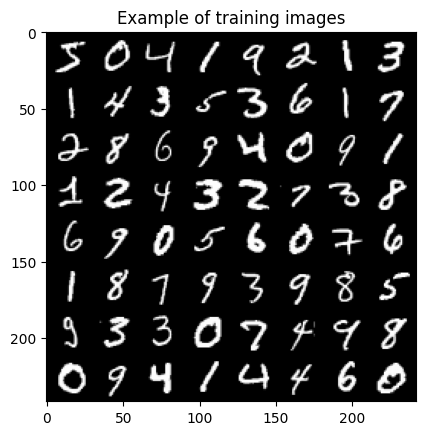

In [18]:
# loaded dataset can be passed to DataLoader, which performs several operations including batching, sampling, and shuffling.
batch_size = 64

train_loader = DataLoader(training_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

# check the training batch
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)  # shape: (sample, color_channel, image height, image width)
print(labels)  # labels are not one-hot encoded.

# visualization
# utils.make_grid concatenate images as a grid, and np.transpose change the order of dimensions (channel,h,w) -> (h,w,channel)
plt.imshow(np.transpose(torchvision.utils.make_grid(images), (1, 2, 0)))
plt.title("Example of training images")

## 5. How to train & test a neural network model

To train a model, loss function needs to be defined.

In [19]:
import torch.optim as optim

model = simpleNN()

# In PyTorch, Cross Entropy Loss function computes (log) softmax of given outputs before computing loss
# LogSoftmax + NLLLoss will be equivalent to this function.
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

n_epoch = 30

In [21]:
train_loss_epochs = []
train_acc_epochs = []

val_loss_epochs = []
val_acc_epochs = []

for epoch in range(n_epoch):

    # running loss
    train_loss = 0.0
    train_acc = 0

    # training
    # depending on train/eval mode, some layers such as Dropout and BatchNorm behave differently
    model.train()

    for i, data in enumerate(train_loader, 0):

        # get the inputs
        images, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # input the images & calculate the loss
        outputs = model(images)
        loss = loss_fn(
            outputs, labels
        )  # CrossEntropyLoss does not expect one-hot encoded labels.

        # calculate the number of correct predictions
        train_acc += (
            (outputs.argmax(1) == labels).sum().item()
        )  # number of correct predictions

        # update weights based on the gradient
        loss.backward()  # back-propagation
        optimizer.step()  # update the weights based on the gradient

        train_loss += loss.item() * images.size(0)

    train_acc /= len(training_data)  # average accuracy for epoch
    train_acc_epochs.append(train_acc)

    print(
        f"epoch: {epoch+1}/{n_epoch}, train loss: {train_loss/len(training_data):.4f}"
    )
    train_loss_epochs.append(train_loss / len(training_data))

    # test
    model.eval()
    with torch.no_grad():  # gradient is not computed during test

        val_loss = 0.0
        val_acc = 0

        for j, data in enumerate(test_loader, 0):

            # get the inputs
            images, labels = data

            # input the images and calculate the loss
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # calculate accuracy & store loss
            val_acc += (
                (outputs.argmax(1) == labels).sum().item()
            )  # number of correct predictions
            val_loss += loss.item() * images.size(0)

        val_loss_epochs.append(val_loss / len(test_data))
        val_acc /= len(test_data)
        val_acc_epochs.append(val_acc)

epoch: 1/30, train loss: 2.2850
epoch: 2/30, train loss: 2.2374
epoch: 3/30, train loss: 2.1631
epoch: 4/30, train loss: 2.0354
epoch: 5/30, train loss: 1.8247
epoch: 6/30, train loss: 1.5311
epoch: 7/30, train loss: 1.2301
epoch: 8/30, train loss: 1.0006
epoch: 9/30, train loss: 0.8448
epoch: 10/30, train loss: 0.7381
epoch: 11/30, train loss: 0.6621
epoch: 12/30, train loss: 0.6057
epoch: 13/30, train loss: 0.5624
epoch: 14/30, train loss: 0.5283
epoch: 15/30, train loss: 0.5007
epoch: 16/30, train loss: 0.4779
epoch: 17/30, train loss: 0.4587
epoch: 18/30, train loss: 0.4424
epoch: 19/30, train loss: 0.4283
epoch: 20/30, train loss: 0.4160
epoch: 21/30, train loss: 0.4052
epoch: 22/30, train loss: 0.3956
epoch: 23/30, train loss: 0.3870
epoch: 24/30, train loss: 0.3793
epoch: 25/30, train loss: 0.3722
epoch: 26/30, train loss: 0.3658
epoch: 27/30, train loss: 0.3599
epoch: 28/30, train loss: 0.3544
epoch: 29/30, train loss: 0.3494
epoch: 30/30, train loss: 0.3446


In [49]:
model.linear_relu_stack[0].weight.detach().numpy()

array([[-2.8780529e-03, -3.0236594e-02, -2.5521599e-02, ...,
        -1.0099351e-02,  1.7490231e-02,  1.8520016e-06],
       [ 2.3583379e-02, -3.5649579e-02, -1.7501074e-03, ...,
         1.4360637e-02,  1.0991667e-02, -1.5026076e-02],
       [ 1.8424984e-02,  3.9077019e-03, -1.5927158e-02, ...,
        -1.0020623e-02,  2.6995903e-02,  1.5441648e-03],
       ...,
       [-3.2964379e-02, -2.3638858e-02,  2.1506349e-02, ...,
        -2.8892651e-02, -1.7444467e-02, -5.8789086e-03],
       [-1.5732868e-02, -1.1524848e-02,  9.3713794e-03, ...,
         6.1872904e-03, -3.5614628e-02,  8.6811191e-04],
       [ 5.8289641e-03,  3.4555208e-02,  2.2960242e-02, ...,
         1.7650485e-02,  2.1274474e-03, -2.0768423e-02]], dtype=float32)

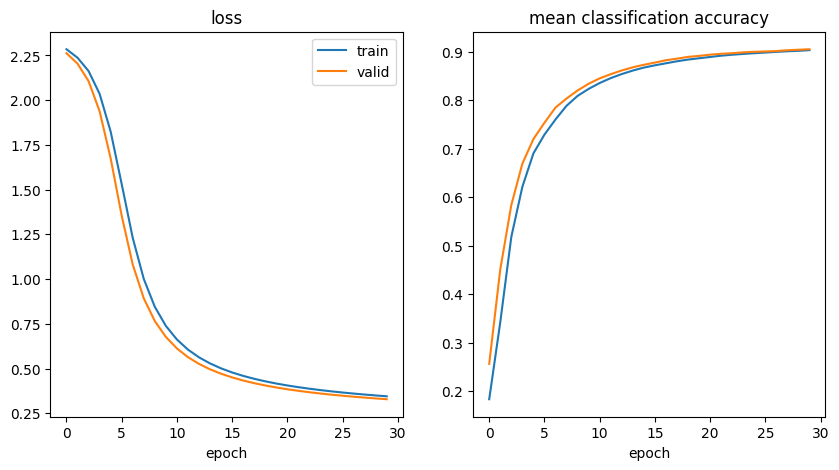

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(train_loss_epochs, label="train")
axs[0].plot(val_loss_epochs, label="valid")
axs[1].plot(train_acc_epochs, label="train")
axs[1].plot(val_acc_epochs, label="valid")

axs[0].legend()

axs[0].set_title("loss")
axs[1].set_title("mean classification accuracy")
for i in range(2):
    axs[i].set_xlabel("epoch")